In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


##CONFIGURANDO NUMEROS COM 2 CASAS DECIMAIS
pd.set_option('Float_format','{:.2f}'.format)

## COMPILANDO ARQUIVOS DA PASTA
pasta = 'C:/Users/Guilh/OneDrive/Área de Trabalho/1-MATERIAIS DE ESTUDO/01 - DIVERSOS/01-RANDOMFOREST/1-ANTT_FERROVIAS/'
arquivos = glob.glob(os.path.join(pasta, '*.csv'))
base_original = pd.concat([pd.read_csv(i, sep=';', encoding='latin1') for i in arquivos], ignore_index = True)

## REMOVENDO PONTO DA COLUNA
base_original['TU'] = base_original['TU'].str.replace('.','',regex=False)
base_original['TKU'] = base_original['TKU'].str.replace('.','',regex=False)

## ALTERANDO FORMATAÇÃO DA COLUNA
base_original['TKU'] = base_original['TKU'].fillna(0)
base_original['TKU'] = base_original['TKU'].astype(float)
base_original['TU'] = base_original['TU'].astype(int)
base_original['TKU'] = base_original['TKU'].astype(int)
base_original['Mes_Ano'] = pd.to_datetime(base_original['Mes_Ano'], format='%m/%Y')

## CRIANDO COLUNAS
base_original['MÊS'] = base_original['Mes_Ano'].dt.month
base_original['ANO'] = base_original['Mes_Ano'].dt.year

#REMOVENDO DUPLICADOS E NULOS
base_original = base_original.drop_duplicates()

# VENDO A BASE
base_original.head(-5)

,Mes_Ano,Ferrovia,Mercadoria_ANTT,Estacao_Origem,UF_Origem,Estacao_Destino,UF_Destino,TU,TKU,MÊS,ANO
0,2006-01-01,EFC,Álcool,Itaqui Base Combustível,MA,Marabá,PA,184,136344,1,2006
1,2006-01-01,EFC,Bebidas e Vasilhames,Ponta da Madeira Pêra do Píer,MA,Imperatriz,MA,1636,999596,1,2006
2,2006-01-01,EFC,Cobre,Paraupebas,PA,Ponta da Madeira Cobre,MA,24461,21158765,1,2006
3,2006-01-01,EFC,Ferro Gusa,Açailândia,MA,Ponta da Madeira Pêra do Píer,MA,116272,60345168,1,2006
4,2006-01-01,EFC,Ferro Gusa,Marabá,PA,Ponta da Madeira Pêra do Píer,MA,205242,152700048,1,2006
...,...,...,...,...,...,...,...,...,...,...,...
148653,2023-04-01,RMS,Soja,Marialva,PR,D Pedro II,PR,179173,111120561,4,2023
148654,2023-04-01,RMS,Soja,Marialva,PR,São Francisco do Sul,SC,80527,58531527,4,2023
148655,2023-04-01,RMS,Soja,Maringa,PR,D Pedro II,PR,193917,126386870,4,2023
148656,2023-04-01,RMS,Soja,Maringa,PR,Rio Grande,RS,1710,3610735,4,2023


In [2]:
##############################          EDA (exploratory data analysis)          ##############################
###################################################################################

print('#########################################')
print('EDA - COLUNAS CATEGORICAS')
print('#########################################\n')

# LINHAS E COLUNAS, NULOS e TIPO ?
base_original.info()
print('----------------------------------')

# DUPLICADOS
if base_original.duplicated().sum() > 0:
    print(f'Total de linhas duplicadas e excluidas: {base_original.duplicated().sum()}')
    base_original.drop_duplicates(inplace=True)
else:
    print('Não há dados duplicados')
print('----------------------------------')

## COLUNAS CATEGORICAS
print('#########################################\n')
print('Representatividade das principais colunas')
print('----------------------------------')
print('---------- Ferrovias ----------')
print(base_original['Ferrovia'].value_counts(normalize=True))
print('----------------------------------')
print('---------- Mercadoria_ANTT ----------')
print(base_original['Mercadoria_ANTT'].value_counts(normalize=True))
print('----------------------------------')
print('---------- Estacao_Origem ----------')
print(base_original['Estacao_Origem'].value_counts(normalize=True))
print('----------------------------------')
print('---------- Estacao_Destino ----------')
print(base_original['Estacao_Destino'].value_counts(normalize=True))
print('----------------------------------')
print('---------- UF_Origem ----------')
print(base_original['UF_Origem'].value_counts(normalize=True))
print('----------------------------------')
print('---------- UF_Destino ----------')
print(base_original['UF_Destino'].value_counts(normalize=True))
print('----------------------------------')

#########################################
EDA - COLUNAS CATEGORICAS
#########################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148629 entries, 0 to 148662
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Mes_Ano          148629 non-null  datetime64[ns]
 1   Ferrovia         148629 non-null  object        
 2   Mercadoria_ANTT  148629 non-null  object        
 3   Estacao_Origem   148629 non-null  object        
 4   UF_Origem        148629 non-null  object        
 5   Estacao_Destino  148629 non-null  object        
 6   UF_Destino       148629 non-null  object        
 7   TU               148629 non-null  int32         
 8   TKU              148629 non-null  int32         
 9   MÊS              148629 non-null  int64         
 10  ANO              148629 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object(6)
memory usage: 12.5+

#########################################
EDA COLUNAS NÚMERICAS
----------------------------------
          Mes_Ano Ferrovia       Mercadoria_ANTT  \
0      2006-01-01      EFC                Álcool   
1      2006-01-01      EFC  Bebidas e Vasilhames   
2      2006-01-01      EFC                 Cobre   
3      2006-01-01      EFC            Ferro Gusa   
4      2006-01-01      EFC            Ferro Gusa   
...           ...      ...                   ...   
148658 2023-04-01      RMS                  Soja   
148659 2023-04-01      RMS                  Soja   
148660 2023-04-01      RMS                  Soja   
148661 2023-04-01      RMS                  Soja   
148662 2023-04-01      RMS                 Ureia   

                       Estacao_Origem UF_Origem  \
0             Itaqui Base Combustível        MA   
1       Ponta da Madeira Pêra do Píer        MA   
2                          Paraupebas        PA   
3                          Açailândia        MA   
4                    

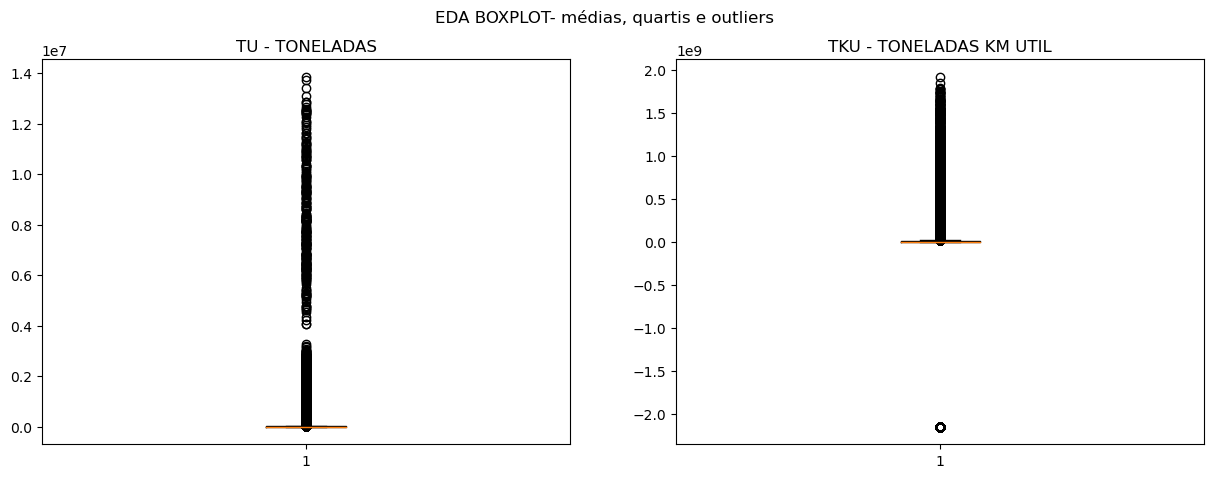

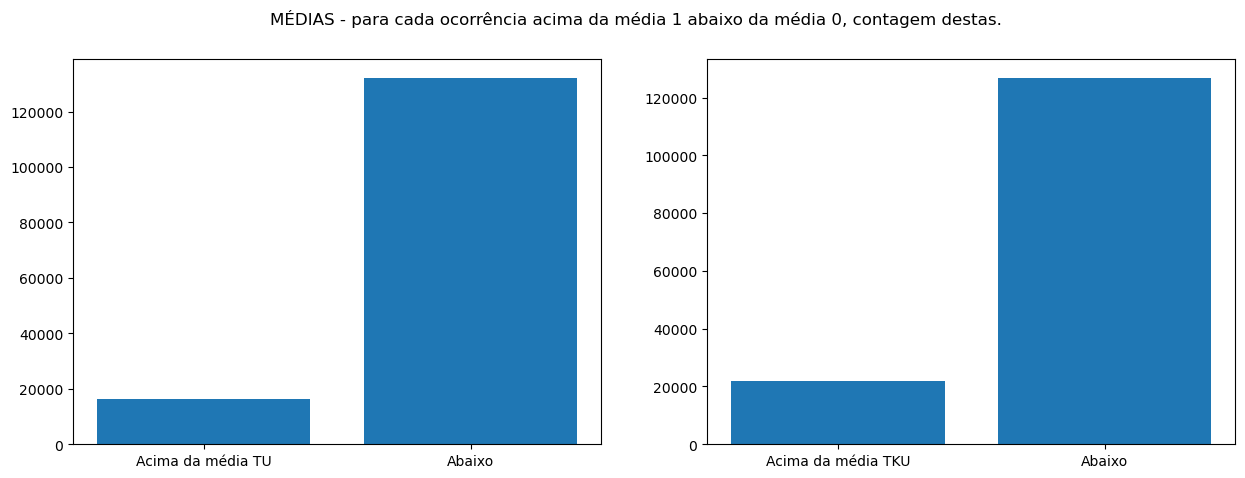

In [3]:
## COLUNAS NÚMERICAS
print('#########################################')
print('EDA COLUNAS NÚMERICAS')
print('----------------------------------')

figura = plt.figure(figsize=(15,5))
figura.suptitle('EDA BOXPLOT- médias, quartis e outliers')

figura.add_subplot(121)
plt.boxplot(base_original['TU'], showfliers=True)
plt.title('TU - TONELADAS')

figura.add_subplot(122)
plt.boxplot(base_original['TKU'], showfliers=True)
plt.title('TKU - TONELADAS KM UTIL')


######
#########################################

# CRIANDO UMA FLAG NA BASE ACIMA OU ABAIXO DA MEDIA
base_original['FLAG_MEDIA_TU'] = np.where(base_original['TU'] >= base_original['TU'].mean(),1,0)
base_original['FLAG_MEDIA_TKU'] = np.where(base_original['TKU'] >= base_original['TKU'].mean(),1,0)
print(base_original)


figura_2 = plt.figure(figsize=(15,5))
figura_2.suptitle('MÉDIAS - para cada ocorrência acima da média 1 abaixo da média 0, contagem destas.')


figura_2.add_subplot(121)
acima_tu = base_original[base_original['FLAG_MEDIA_TU'] == 1]['FLAG_MEDIA_TU'].count()
abaixo_tu = base_original[base_original['FLAG_MEDIA_TU'] == 0]['FLAG_MEDIA_TU'].count()
plt.bar(['Acima da média TU', 'Abaixo'], [acima_tu, abaixo_tu])


figura_2.add_subplot(122)
acima_tku = base_original[base_original['FLAG_MEDIA_TKU'] == 1]['FLAG_MEDIA_TKU'].count()
abaixo_tku = base_original[base_original['FLAG_MEDIA_TKU'] == 0]['FLAG_MEDIA_TKU'].count()
plt.bar(['Acima da média TKU', 'Abaixo'], [acima_tku, abaixo_tku])


plt.show()


#########################################
EDA - FERROVIAS MAIS USADAS EM TONELADAS
----------------------------------


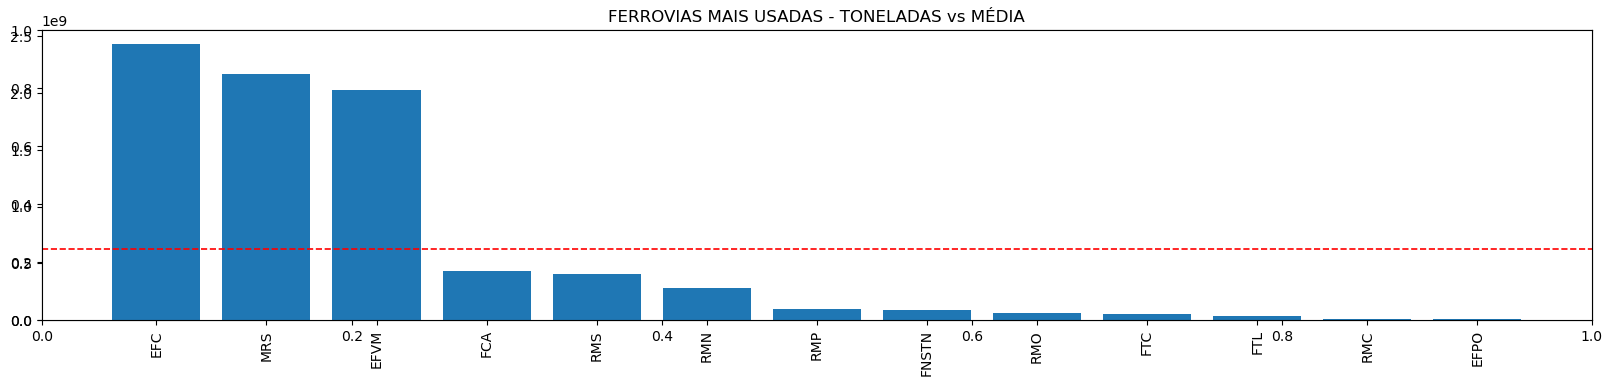

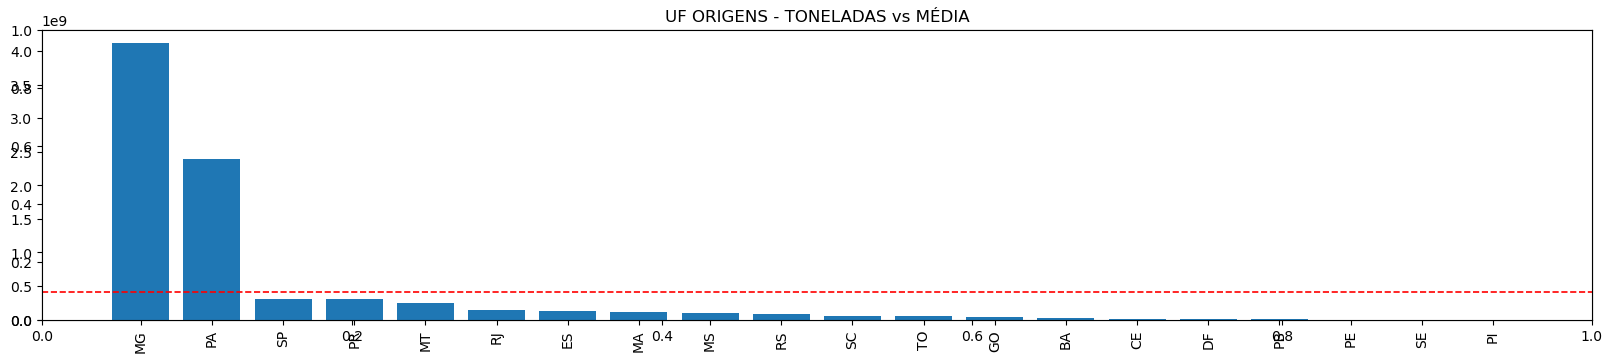

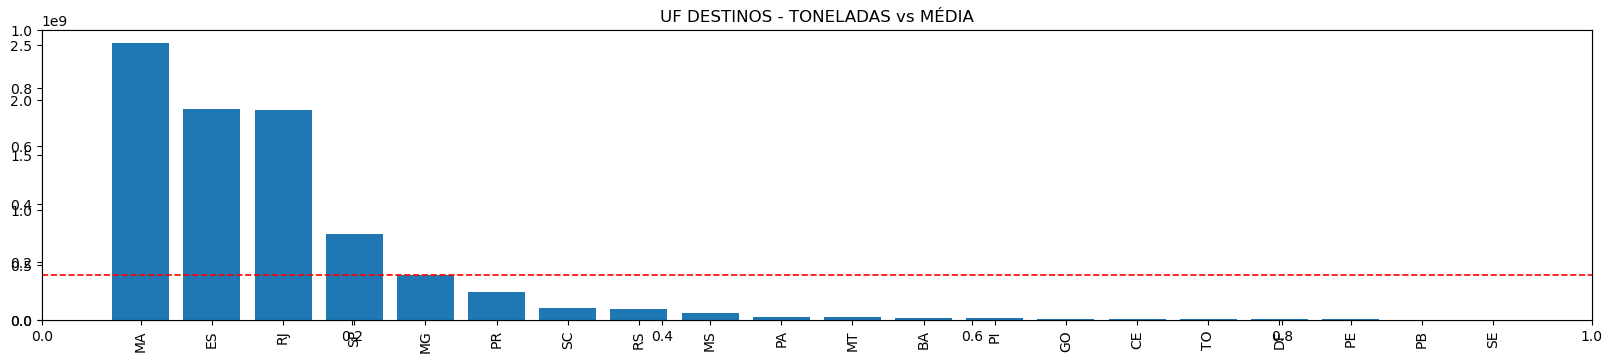

In [4]:
## DISTRIBUIÇÕES DE FREQUÊNCIA
print('#########################################')
print('EDA - FERROVIAS MAIS USADAS EM TONELADAS')
print('----------------------------------')

figura = plt.figure(figsize=(20,5))
plt.title('FERROVIAS MAIS USADAS - TONELADAS vs MÉDIA')


figura.add_subplot(111)
um = base_original.groupby('Ferrovia')['TU'].sum().reset_index().sort_values(by='TU', ascending=False)
plt.bar(um['Ferrovia'], um['TU'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.axhline(y= np.mean(um['TU']), color='red', linestyle='--', linewidth=1.2)



figura2 = plt.figure(figsize=(20,5))
plt.title('UF ORIGENS - TONELADAS vs MÉDIA')

figura2.add_subplot(111)
dois = base_original.groupby('UF_Origem')['TU'].sum().reset_index().sort_values(by='TU', ascending=False)
plt.bar(dois['UF_Origem'], dois['TU'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.axhline(y= np.mean(dois['TU']), color='red', linestyle='--', linewidth=1.2)





figura3 = plt.figure(figsize=(20,5))
plt.title('UF DESTINOS - TONELADAS vs MÉDIA')
figura3.add_subplot(111)
dois = base_original.groupby('UF_Destino')['TU'].sum().reset_index().sort_values(by='TU', ascending=False)
plt.bar(dois['UF_Destino'], dois['TU'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.axhline(y= np.mean(dois['TU']), color='red', linestyle='--', linewidth=1.2)




plt.show()
#teste.sort_values(by='TU', ascending=False)

In [5]:
####################################################################################

#     CRIANDO MODELO RANDOMFORESTCLASSIFIER

####################################################################################


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from numpy import random


np.random.seed(0)


## BASE MODELO
print(base_original.columns)
print('--------------------')
base_modelo = base_original

# DUMMIES
#base_modelo = pd.get_dummies(base_original)

# TRANSFORMANDO COLUNAS
base_modelo['ANO'] = base_modelo['ANO'].astype(int)
base_modelo['MÊS'] = base_modelo['MÊS'].astype(int)
base_modelo['TU'] = base_modelo['TU'].astype(int)
base_modelo['TKU'] = base_modelo['TKU'].astype(int)

# CRIANDO OS CÓDIGOS DE CADA CATEGORIA
categ = base_modelo.select_dtypes(include=['object', 'category']).copy()
cod_categorica = categ.apply(lambda col: col.astype('category').cat.codes)
codigos_categorias = pd.concat([base_modelo, cod_categorica], axis=1)

## BASE FINAL MODELO
base_modelo = codigos_categorias.select_dtypes(exclude=['object', 'category']).copy()
base_modelo = base_modelo.drop(columns=['Mes_Ano'])

#DUPLICADOS
base_modelo = base_modelo.drop_duplicates()
base_modelo = base_modelo.fillna(0)


# LIMITANDO A BASE REMOVENDO 2023
base_modelo = base_modelo[base_modelo['ANO'] != 2023][list(base_modelo.columns)]


#print(codigos_categorias.head(-5))
print(' O ano maximo é:', {base_modelo['ANO'].max()})
base_modelo.head(-5)




Index(['Mes_Ano', 'Ferrovia', 'Mercadoria_ANTT', 'Estacao_Origem', 'UF_Origem',
       'Estacao_Destino', 'UF_Destino', 'TU', 'TKU', 'MÊS', 'ANO',
       'FLAG_MEDIA_TU', 'FLAG_MEDIA_TKU'],
      dtype='object')
--------------------
 O ano maximo é: {2022}


,TU,TKU,MÊS,ANO,FLAG_MEDIA_TU,FLAG_MEDIA_TKU,Ferrovia,Mercadoria_ANTT,Estacao_Origem,UF_Origem,Estacao_Destino,UF_Destino
0,184,136344,1,2006,0,0,0,98,216,5,234,9
1,1636,999596,1,2006,0,0,0,11,316,5,187,5
2,24461,21158765,1,2006,0,1,0,22,293,9,296,5
3,116272,60345168,1,2006,1,1,0,44,36,5,297,5
4,205242,152700048,1,2006,1,1,0,44,252,9,297,5
...,...,...,...,...,...,...,...,...,...,...,...,...
146118,3373,1689140,12,2022,0,0,12,100,337,15,185,15
146119,7587,3167167,12,2022,0,0,12,100,337,15,225,16
146120,12232,3407661,12,2022,0,0,12,100,337,15,274,15
146121,2515,771939,12,2022,0,0,12,100,337,15,345,15


In [6]:
# VARIAVEIS
x = base_modelo.drop(columns=['TU'])
y = base_modelo['TU']

print('\nVERIFICANDO O AJUSTE')
maximo_x = base_modelo['ANO'].max()
print(maximo_x)

# SEPARANDO TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


# CRIANDO MODELO (10 arvores, profundidade 3, replicabilidade seed 2)
modelo = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=2)
modelo.fit(x_train, y_train)

# VALIDAÇÃO CRUZADA
kf = KFold(n_splits=5, shuffle= True, random_state=2)
cross_validation = cross_val_score(modelo, x, y, cv=kf, scoring='r2')

########## RESULTADOS VALIDAÇÃO CRUZADA
print('----------  RESULTADOS VALIDAÇÃO CRUZADA  ----------')
print(f"O tipo do modelo carregado é: {type(modelo)}")
print(f"Acurácias para cada fold (cross-validation): {cross_validation}")
print(f"Acurácia média (cross-validation): {cross_validation.mean()*100}")
print(f"Desvio padrão das acurácias (cross validation): {cross_validation.std()}")



###################################################################

#   SALVANDO MODELO

###################################################################


from joblib import dump, load

print('----------  SALVANDO MODELO DOIS  ----------')
dump(modelo,'ANTT_RANDOMFORESTREGRESSOR.joblib')


VERIFICANDO O AJUSTE
2022
----------  RESULTADOS VALIDAÇÃO CRUZADA  ----------
O tipo do modelo carregado é: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Acurácias para cada fold (cross-validation): [0.9796102  0.98267003 0.98128526 0.98012577 0.98185526]
Acurácia média (cross-validation): 98.11093037603477
Desvio padrão das acurácias (cross validation): 0.0011169545570075005
----------  SALVANDO MODELO DOIS  ----------


['ANTT_RANDOMFORESTREGRESSOR.joblib']

In [7]:
###################################################################

# APLICANDO MODELO NO CONJUNTO DE DADOS

###################################################################

np.random.seed(2)

cenario_hoje = base_original[base_original['ANO'] == 2023][list(base_original.columns)]
cenario_hoje.head(-5)


# TRANSFORMANDO 
#cenario_hoje['ANO'] = cenario_hoje['ANO'].atype(int)
cenario_hoje['MÊS'] = cenario_hoje['MÊS'].astype(int)
cenario_hoje['TU'] = cenario_hoje['TU'].astype(int)
cenario_hoje['TKU'] = cenario_hoje['TKU'].astype(int)


#
# CRIANDO OS CÓDIGOS DE CADA CATEGORIA
categ_hoje = cenario_hoje.select_dtypes(include=['object', 'category']).copy()
cod_categorica_hoje = categ_hoje.apply(lambda col: col.astype('category').cat.codes)
codigos_categorias_hoje = pd.concat([cenario_hoje, cod_categorica_hoje], axis=1)



## BASE FINAL MODELO
base_cenario = codigos_categorias_hoje.select_dtypes(exclude=['object', 'category']).copy()
base_cenario = base_cenario.drop(columns=['Mes_Ano'])

#DUPLICADOS
base_cenario = base_cenario.drop_duplicates()
base_cenario = base_cenario.fillna(0)

base_cenario.head(-5)



############################################################################

# APLICANDO MODELO


############################################################################


# CARREGANDO MODELO
modelo_cenario = load('ANTT_RANDOMFORESTREGRESSOR.joblib')

##CRIANDO A BASE DO ML UTILIZANDO O STATUS EM BINARIO
cenario_um_completo = base_cenario.drop(columns=['TU'])
cenario_um_target = base_cenario['TU'].values

#FAZENDO AS PREVISOES NO CONJUNTO DE TESTE
pred_cenario_um = modelo_cenario.predict(cenario_um_completo)
acuracia_cenario_um = r2_score(cenario_um_target, pred_cenario_um)

#RESULTADOS 
print("----------------- ACURACIAS DO MODELO NO CENÁRIO 1 -----------------------------------")
print(f"Acurácia no cenário 1: {acuracia_cenario_um*100:.2f}%")
print(f"Acurácias para cada fold: {acuracia_cenario_um}")
print(f"Acurácia média: {acuracia_cenario_um.mean()*100}")
print(f"Desvio padrão das acurácias (cross validation): {acuracia_cenario_um.std()}")
print("---------------------Relatório de Classificação------------------------------")
print("MAE:", mean_absolute_error(cenario_um_target, pred_cenario_um))
print("RMSE:", mean_squared_error(cenario_um_target, pred_cenario_um, squared=False))
print("R²:", r2_score(cenario_um_target, pred_cenario_um))


'''
##################################

# ACURACIA 

consegue explicar cerca de 38,6% da variação da variável alvo (TU). Isso é melhor do que um chute aleatório, 
mas ainda distante de um bom ajuste (ideal: acima de 0,70 em muitos contextos). 
Pode indicar que variáveis importantes estão faltando ou que os dados têm muita variabilidade.


# ERRO ABSOLUTO MEDIO - MAE mean absolute error

Em média, o modelo erra cerca de 42.535 unidades na previsão de TU. Esse valor deve ser 
interpretado em relação à escala dos dados — se TU varia de 0 a milhões, 
esse erro pode ser tolerável; se não, pode ser alto.


# RMSE - Raiz do erro quadratico médio - Raise mean squared error

Esse erro penaliza mais fortemente grandes erros. Um RMSE muito maior que o MAE (como aqui) indica que 
há outliers ou erros muito grandes em alguns casos que estão influenciando bastante a performance.


# DESVIO PADRÃO 

O valor estar zerado é incomum. Pode indicar que todas as folds usaram dados muito parecidos (baixa variabilidade) ou que algo 
está errado no particionamento. 
Sugere verificar se x e y foram bem embaralhados ou se há algum viés nos dados.


################################  

PARAMETROS


# MAX_DEPTH
Quando eu uso max_depth=3 o modelo cria arvores mais curtas, quando eu uso max_depth=5 o modelo mais profundo.
esse ajuste na profundidade permite que as arvores aprendam melhor com padrões mais complexos.
um max_depth=3 obtem do conjunto de dados 38% de r2 .......quando max_depth=5 r2 vai para 85% ....devido o ajuste.

Por este motivo seguiremos com o ajuste de parametro definitivo para max_depth=5 trazendo mais profundidade.
'''



----------------- ACURACIAS DO MODELO NO CENÁRIO 1 -----------------------------------
Acurácia no cenário 1: 84.69%
Acurácias para cada fold: 0.8469165190819087
Acurácia média: 84.69165190819086
Desvio padrão das acurácias (cross validation): 0.0
---------------------Relatório de Classificação------------------------------
MAE: 20390.083922122165
RMSE: 130343.14402798694
R²: 0.8469165190819087


'\n##################################\n\n# ACURACIA \n\nconsegue explicar cerca de 38,6% da variação da variável alvo (TU). Isso é melhor do que um chute aleatório, \nmas ainda distante de um bom ajuste (ideal: acima de 0,70 em muitos contextos). \nPode indicar que variáveis importantes estão faltando ou que os dados têm muita variabilidade.\n\n\n# ERRO ABSOLUTO MEDIO - MAE mean absolute error\n\nEm média, o modelo erra cerca de 42.535 unidades na previsão de TU. Esse valor deve ser \ninterpretado em relação à escala dos dados — se TU varia de 0 a milhões, \nesse erro pode ser tolerável; se não, pode ser alto.\n\n\n# RMSE - Raiz do erro quadratico médio - Raise mean squared error\n\nEsse erro penaliza mais fortemente grandes erros. Um RMSE muito maior que o MAE (como aqui) indica que \nhá outliers ou erros muito grandes em alguns casos que estão influenciando bastante a performance.\n\n\n# DESVIO PADRÃO \n\nO valor estar zerado é incomum. Pode indicar que todas as folds usaram dados mu